# Linear Regression with Gradient Descent 
In this notebook we extend our previous implementation of **general function via gradient descent**  to build a **linear regression gradient descent** from scratch, using only NumPy.  

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation



In [2]:
# defining a linear model
def linear_model(x, m, b):
    return m*x + b


In [3]:
# Loss function (mean squared error)
def mse_loss(m, b):
    return np.mean((Y - linear_model(X, m, b))**2)


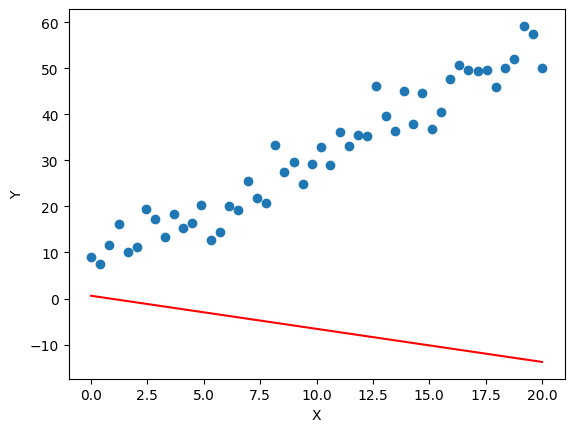

Total loss is 1766.5031899691112


In [4]:
# creating dataset
# Seed for reproducibility
np.random.seed(42)

# Enhanced dataset: y = 2.5x + 7 + noise
X = np.linspace(0, 20, 50)
Y = 2.5 * X + 7 + np.random.normal(0, 4, size=X.shape)

# Initialize parameters
# Random initialization of m and b

m = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)

learning_rate = 0.0001
iterations = 200
y_pred = linear_model(X, m, b)

plt.scatter(X, Y)
plt.plot(X, y_pred, color='red', label=f'Initial line: y={m:.2f}x+{b:.2f}')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

print(f"Total loss is {mse_loss(m,b)}")




- we can see here that our total loss is so high, our goal is to minimize it with gradient descent

In [5]:
from IPython.display import clear_output
# Gradient descent loop
m_values = [m]
b_values = [b]
loss_values = [mse_loss(m, b)]
print(f"starting with m: {m:.2f}, b: {b:.2f}, now our total loss is {mse_loss(m,b):.2f}")
for i in range(iterations):
    print(f"we're in iteration #{i+1}...")
    y_pred = linear_model(X,m,b)
    error = y_pred - Y

    # Compute gradients
    dm = (2/len(X)) * np.sum(error * X)
    db = (2/len(X)) * np.sum(error)

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db
    print(f"updating m: {m:.2f}, updating b: {b:.2f}, now our total loss is {mse_loss(m,b):.2f}")


    m_values.append(m)
    b_values.append(b)
    loss_values.append(mse_loss(m, b))



print(f"Final m: {m:.2f}, Final b: {b:.2f}")

starting with m: -0.72, b: 0.60, now our total loss is 1766.50
we're in iteration #1...
updating m: -0.62, updating b: 0.61, now our total loss is 1673.36
we're in iteration #2...
updating m: -0.53, updating b: 0.62, now our total loss is 1585.20
we're in iteration #3...
updating m: -0.44, updating b: 0.63, now our total loss is 1501.75
we're in iteration #4...
updating m: -0.35, updating b: 0.63, now our total loss is 1422.76
we're in iteration #5...
updating m: -0.26, updating b: 0.64, now our total loss is 1348.00
we're in iteration #6...
updating m: -0.17, updating b: 0.65, now our total loss is 1277.22
we're in iteration #7...
updating m: -0.09, updating b: 0.65, now our total loss is 1210.23
we're in iteration #8...
updating m: -0.01, updating b: 0.66, now our total loss is 1146.82
we're in iteration #9...
updating m: 0.06, updating b: 0.67, now our total loss is 1086.80
we're in iteration #10...
updating m: 0.14, updating b: 0.67, now our total loss is 1029.98
we're in iteration

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left: regression line
ax1.scatter(X, Y, color='blue')
line, = ax1.plot(X, m_values[0]*X + b_values[0], 'r-', linewidth=2)
ax1.set_title("Gradient Descent Fit")

# Right: loss over iterations
ax2.set_xlim(0, len(loss_values))
ax2.set_ylim(0, max(loss_values)*1.1)
loss_line, = ax2.plot([], [], 'g-', linewidth=2)
ax2.set_title("Loss over Iterations")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("MSE Loss")

# Animation function
def animate(i):
    line.set_ydata(m_values[i]*X + b_values[i])
    loss_line.set_data(range(i+1), loss_values[:i+1])
    return line, loss_line

ani = FuncAnimation(fig, animate, frames=len(m_values), interval=100, blit=True)

ani.save("linear_regression_graphs.gif", writer='pillow', fps=10)

plt.close(fig)



![Gradient Descent Animation](linear_regression_graphs.gif)


In [7]:
print(f'started with loss function of {loss_values[0]} and ended up minimizing the loss with GD to {loss_values[-1]}')

started with loss function of 1766.5031899691112 and ended up minimizing the loss with GD to 23.527202283466462
